# Example of shear-wave splitting applied to an icequake from Rutford Ice Stream, Antarctica

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

## 1. Load data for event:

In [3]:
# Load data:
archive_path = "data/mseed"
archive_vs_file = "archive"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(archive_path, starttime=starttime, endtime=endtime)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()


In [4]:
# st = st.select(station="ST01")

In [5]:
# # Add noise to data (for testing...) :
# for i in range(len(st)):
#     st[i].data = st[i].data + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1))) + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1)))

## 2. Calculate splitting:

In [25]:
# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st, nonlinloc_event_path=nonlinloc_event_path) #(st, nonlinloc_event_path) #(st.select(station="ST01"), nonlinloc_event_path)
splitting_event.overall_win_start_pre_fast_S_pick = 0.3 #0.1
splitting_event.win_S_pick_tolerance = 0.1
splitting_event.overall_win_start_post_fast_S_pick = 0.2 #0.2
splitting_event.rotate_step_deg = 2.0 #1.0 #2.5
splitting_event.max_t_shift_s = 0.1 #0.12
splitting_event.n_win = 10 #5 #10
# splitting_event.perform_sp
splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV_and_XC") #(coord_system="LQT") #(coord_system="ZNE")
# splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV") #(coord_system="LQT") #(coord_system="ZNE")


/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:807: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC
/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:807: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC
/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:807: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC
/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:807: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC
/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:807: RuntimeWarning: divide by zero encounte

No S phase pick for station: ST06 therefore skipping this station.
No S phase pick for station: ST07 therefore skipping this station.
No S phase pick for station: ST08 therefore skipping this station.
No S phase pick for station: ST09 therefore skipping this station.
No S phase pick for station: ST10 therefore skipping this station.


,station,phi_from_Q,phi_from_N,phi_from_U,phi_err,dt,dt_err,src_pol_from_N,src_pol_from_U,src_pol_from_N_err,src_pol_from_U_err,Q_w,ray_back_azi,ray_inc
0,ST01,-38.0,70.74,90.0,3.0,0.048,0.001,10.369942,91.786381,9.483751,6.103969,-0.890006,108.74,156.5
0,ST02,60.0,89.53,90.0,2.0,0.042,0.011,5.575889,89.495903,6.436617,2.740569,0.000000,29.53,160.6
0,ST03,-60.0,114.47,90.0,4.0,0.020,0.001,48.199288,84.118719,12.880766,23.807806,0.000000,354.47,144.4
0,ST04,-26.0,76.07,90.0,2.0,0.044,0.001,7.368197,89.555464,6.430684,3.923207,0.000000,282.07,163.9
0,ST05,48.0,-83.43,90.0,10.0,0.004,0.003,176.197600,90.053641,17.214782,10.537896,0.000000,48.57,141.8


## 3. Plot result:

<IPython.core.display.Javascript object>


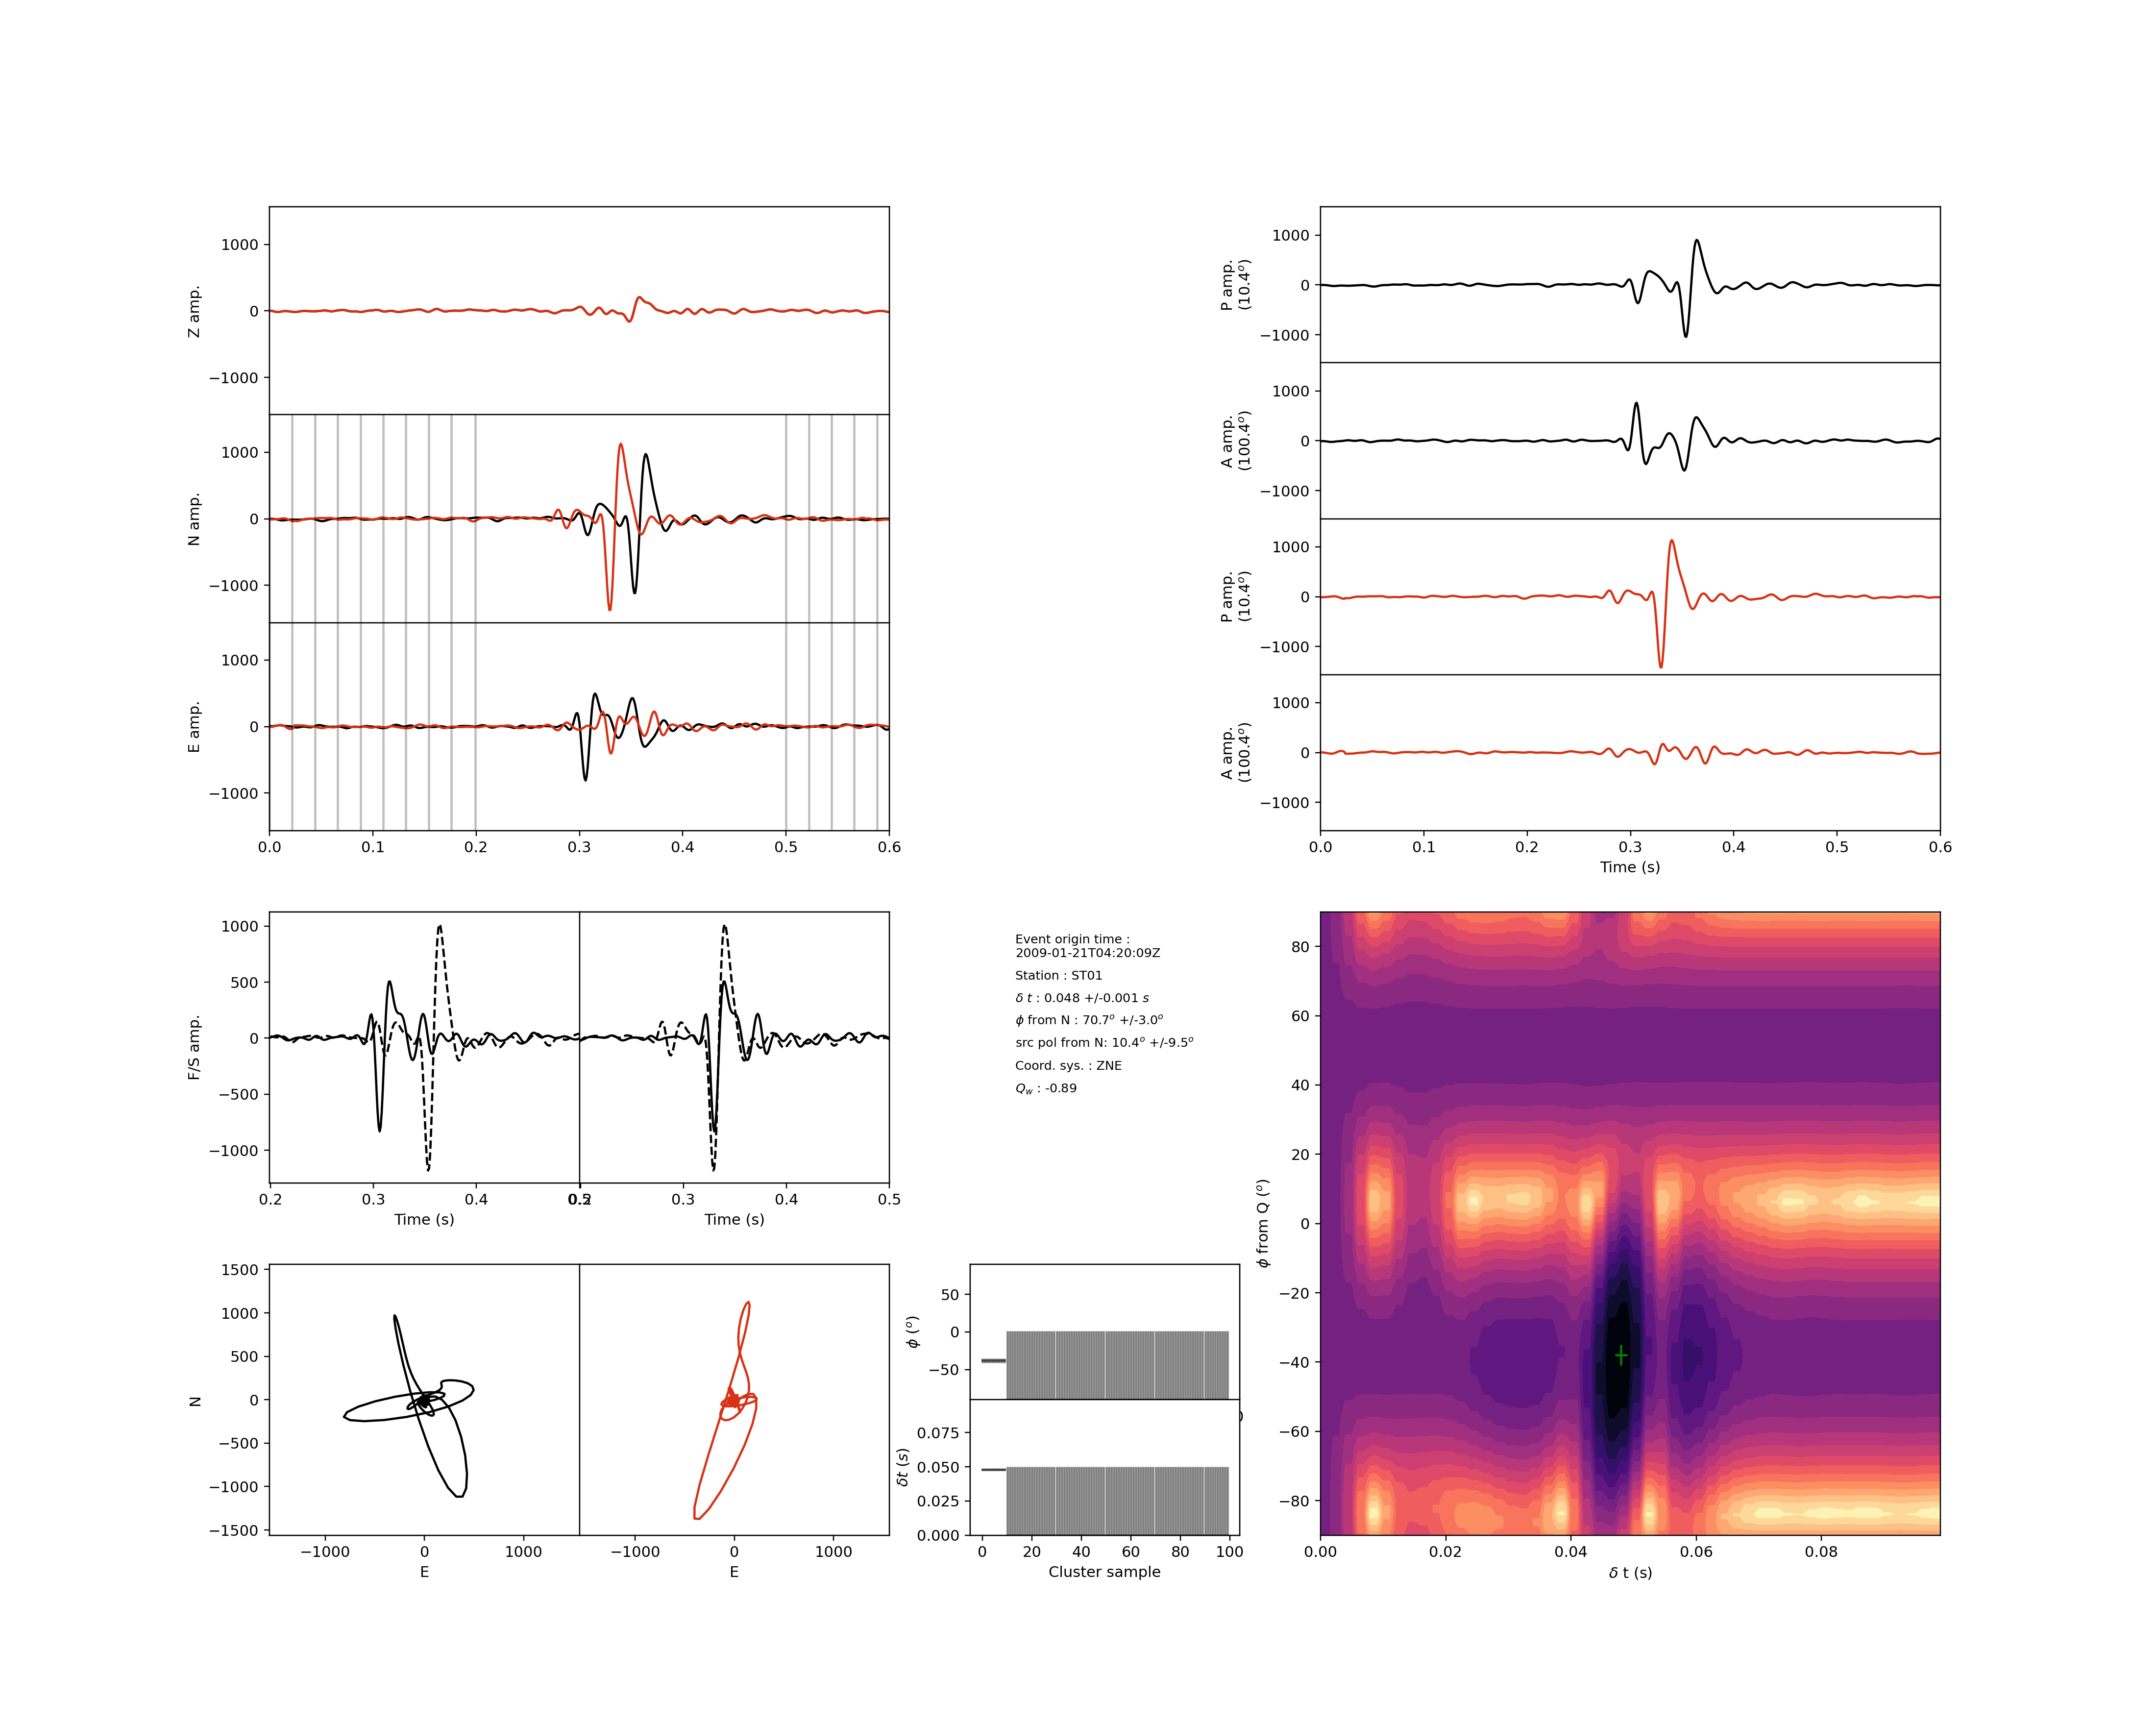

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1308: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>


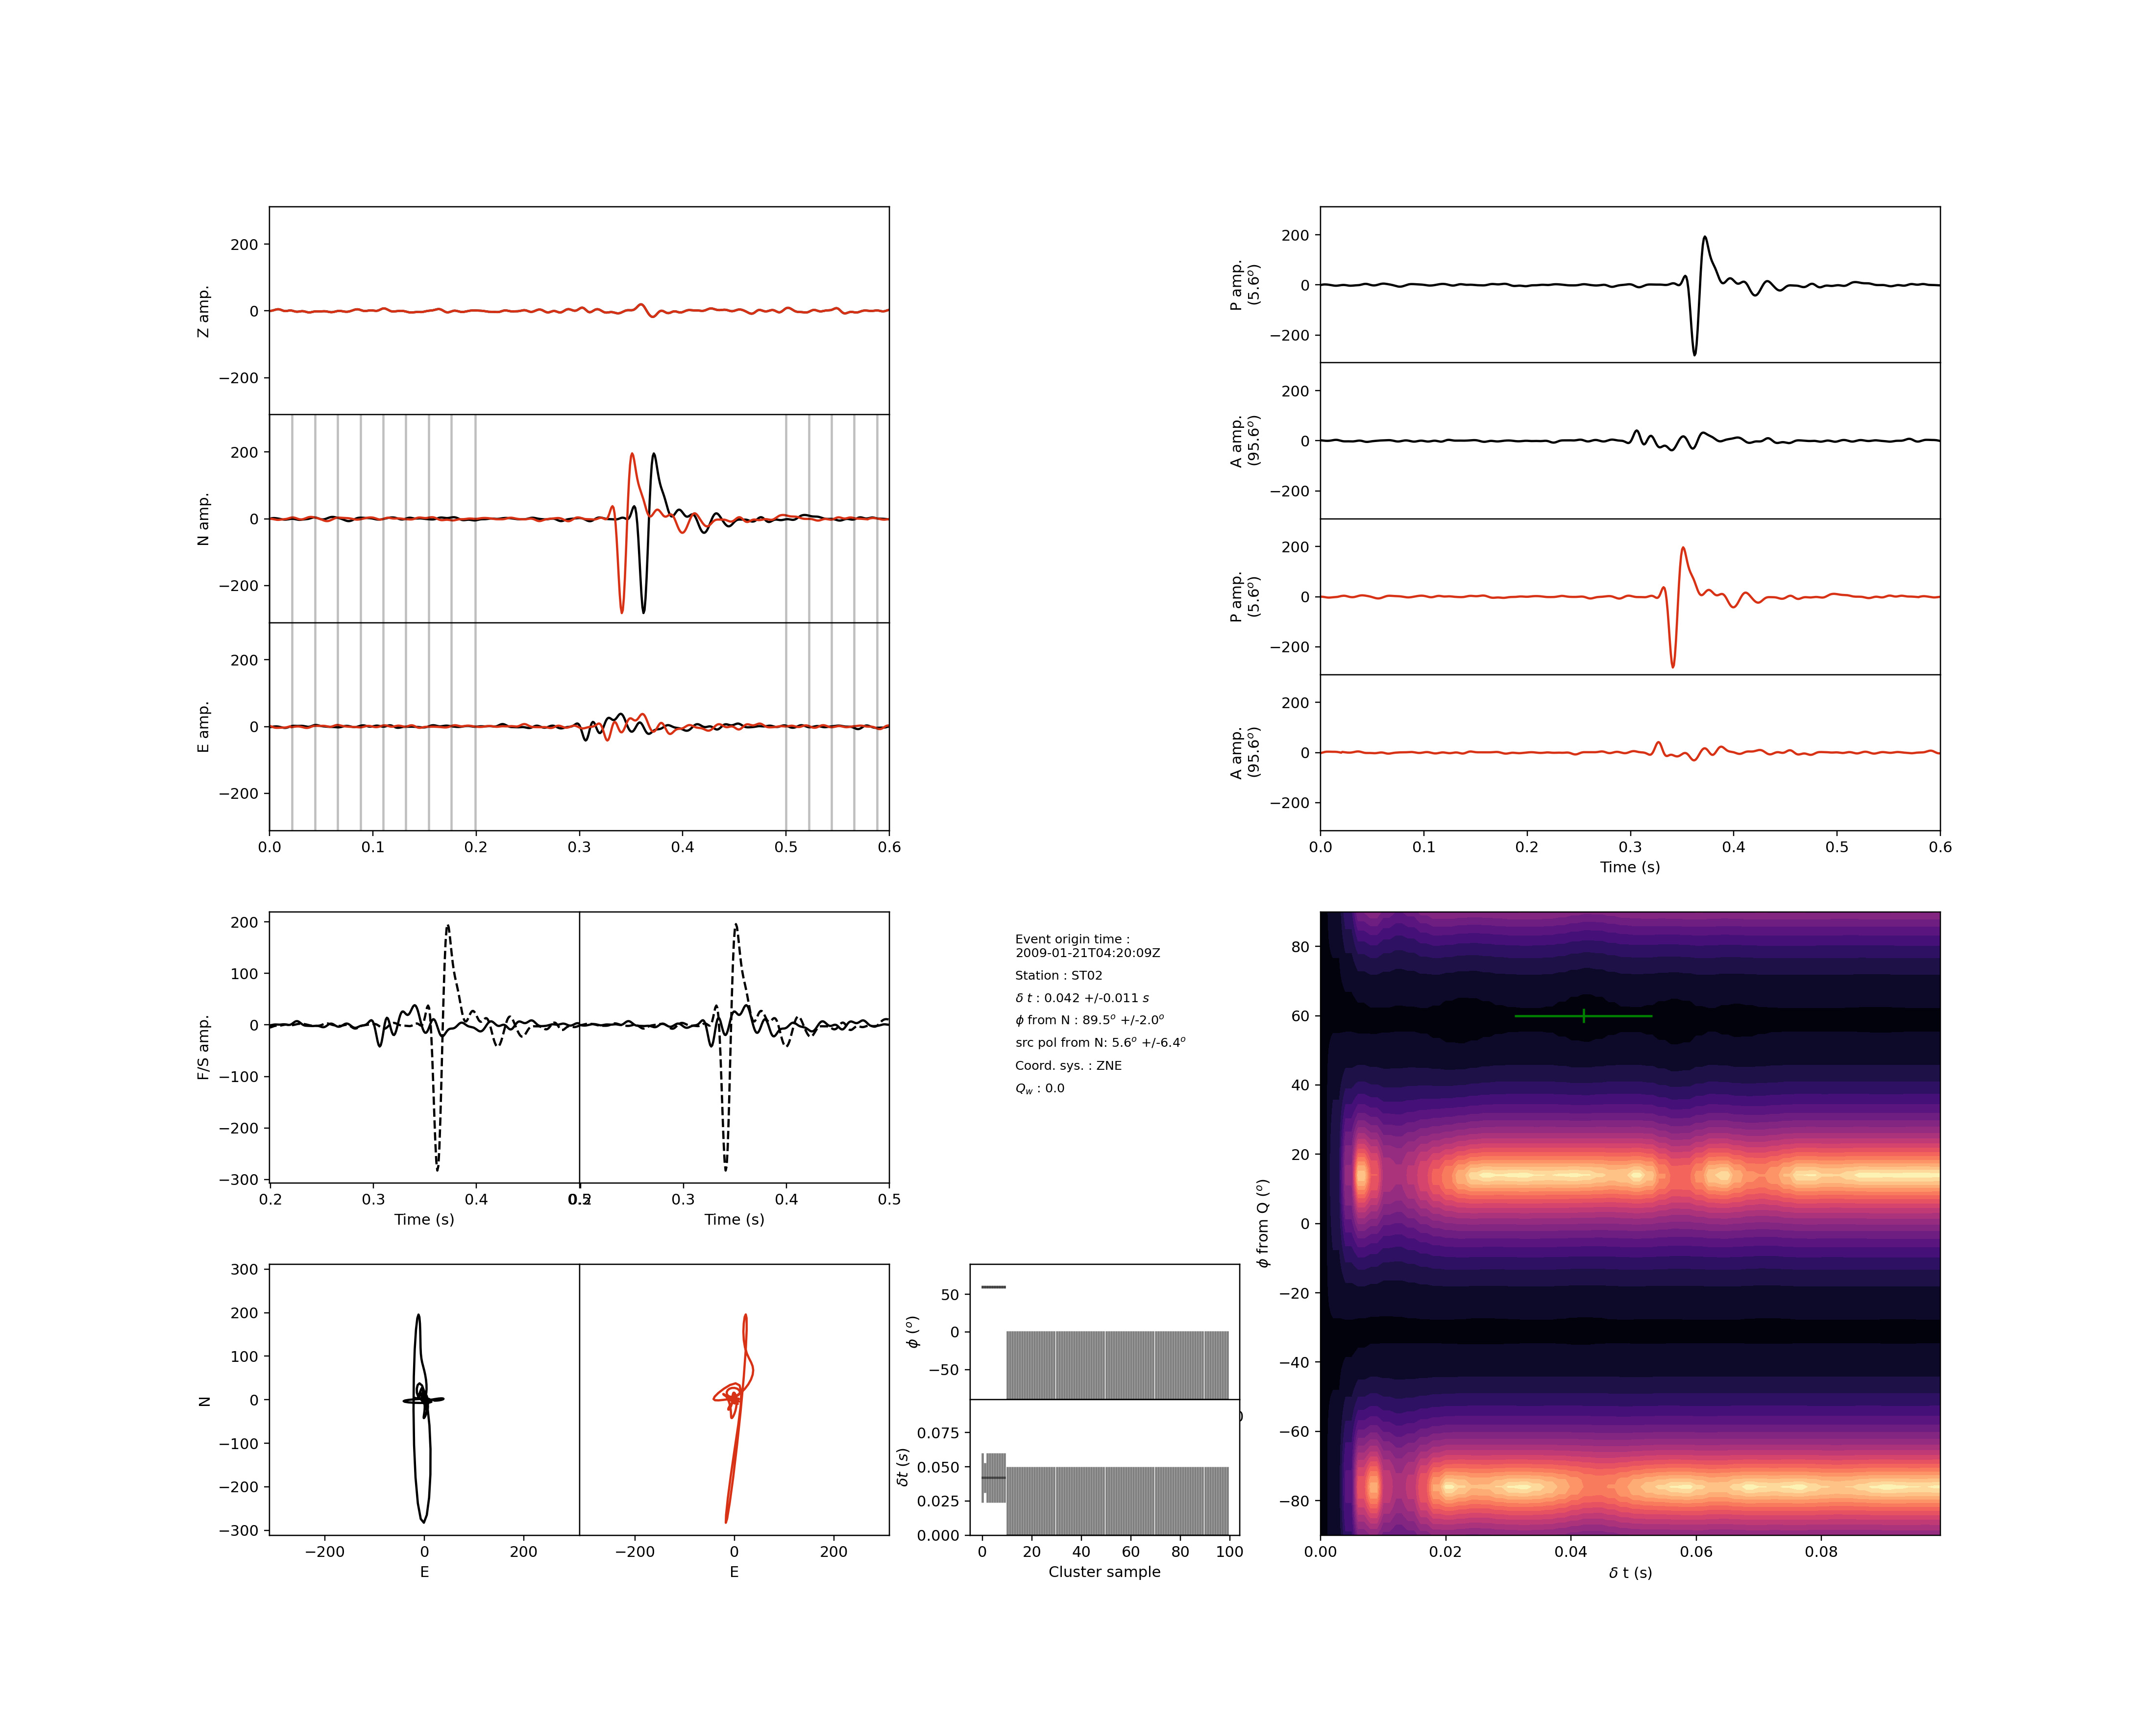

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1308: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1308: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1308: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1308: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


No S phase pick for station: ST06 therefore skipping this station.
Skipping waveform correction for station: ST06
No S phase pick for station: ST07 therefore skipping this station.
Skipping waveform correction for station: ST07
No S phase pick for station: ST08 therefore skipping this station.
Skipping waveform correction for station: ST08
No S phase pick for station: ST09 therefore skipping this station.
Skipping waveform correction for station: ST09
No S phase pick for station: ST10 therefore skipping this station.
Skipping waveform correction for station: ST10


In [26]:
splitting_event.plot(outdir='plots')

## 4. Save result:

In [27]:
# And save result to file:
splitting_event.save_result()


Saved sws result to: /Users/eart0504/Documents/python/github_repositories/swspy/examples/icequake_example/20090121042009_sws_result.csv
